In [1]:
%load_ext zipline
%load_ext dotenv
%dotenv
import pyfolio as pf
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:

# Injected parameters
from dagster import seven as __dm_seven
import dagstermill as __dm_dagstermill
context = __dm_dagstermill._reconstitute_job_context(
    **{
        key: __dm_seven.json.loads(value)
        for key, value
        in {'executable_dict': '{"__class__": "ReconstructablePipeline", "asset_check_selection": {"__frozenset__": []}, "asset_selection": {"__frozenset__": [{"__class__": "AssetKey", "path": ["full_tear_sheet"]}]}, "pipeline_name": "__ASSET_JOB", "repository": {"__class__": "ReconstructableRepository", "container_context": null, "container_image": null, "entry_point": ["dagster"], "executable_path": "/home/cest/.conda/envs/evolufy/bin/python", "pointer": {"__class__": "ModuleCodePointer", "fn_name": "defs", "module": "workflows.primary", "working_directory": "/home/cest/Workspace/playground/evolufy"}, "repository_load_data": null}, "solid_selection_str": null}', 'job_run_dict': '{"__class__": "PipelineRun", "asset_check_selection": {"__frozenset__": []}, "asset_selection": {"__frozenset__": [{"__class__": "AssetKey", "path": ["full_tear_sheet"]}]}, "execution_plan_snapshot_id": "30f147b51fb335170bab14ef82d1a6fb49d18f25", "external_pipeline_origin": {"__class__": "ExternalPipelineOrigin", "external_repository_origin": {"__class__": "ExternalRepositoryOrigin", "repository_location_origin": {"__class__": "ManagedGrpcPythonEnvRepositoryLocationOrigin", "loadable_target_origin": {"__class__": "LoadableTargetOrigin", "attribute": null, "executable_path": null, "module_name": "workflows.primary", "package_name": null, "python_file": null, "working_directory": null}, "location_name": "workflows.primary"}, "repository_name": "__repository__"}, "pipeline_name": "__ASSET_JOB"}, "has_repository_load_data": false, "mode": null, "parent_run_id": null, "pipeline_code_origin": {"__class__": "PipelinePythonOrigin", "pipeline_name": "__ASSET_JOB", "repository_origin": {"__class__": "RepositoryPythonOrigin", "code_pointer": {"__class__": "ModuleCodePointer", "fn_name": "defs", "module": "workflows.primary", "working_directory": "/home/cest/Workspace/playground/evolufy"}, "container_context": {}, "container_image": null, "entry_point": ["dagster"], "executable_path": "/home/cest/.conda/envs/evolufy/bin/python"}}, "pipeline_name": "__ASSET_JOB", "pipeline_snapshot_id": "64e04670a61185017e6b8865af873f6f4b0bcf1d", "root_run_id": null, "run_config": {}, "run_id": "f02f3605-80ba-4546-a41b-42ceea39f502", "solid_selection": null, "solids_to_execute": null, "status": {"__enum__": "PipelineRunStatus.STARTING"}, "step_keys_to_execute": null, "tags": {".dagster/grpc_info": "{\\"host\\": \\"localhost\\", \\"socket\\": \\"/tmp/tmpflkzsy7m\\"}"}}', 'node_handle_kwargs': '{"name": "full_tear_sheet", "parent": null}', 'instance_ref_dict': '{"__class__": "InstanceRef", "compute_logs_data": {"__class__": "ConfigurableClassData", "class_name": "LocalComputeLogManager", "config_yaml": "base_dir: /home/cest/Workspace/playground/evolufy/tmpmsnnyj9e/storage\\n", "module_name": "dagster.core.storage.local_compute_log_manager"}, "custom_instance_class_data": null, "event_storage_data": {"__class__": "ConfigurableClassData", "class_name": "PostgresEventLogStorage", "config_yaml": "postgres_db:\\n  db_name:\\n    env: DAGSTER_POSTGRES_DB\\n  hostname:\\n    env: DAGSTER_POSTGRES_HOSTNAME\\n  password:\\n    env: DAGSTER_POSTGRES_PASSWORD\\n  port: 5432\\n  username:\\n    env: DAGSTER_POSTGRES_USER\\n", "module_name": "dagster_postgres.event_log"}, "local_artifact_storage_data": {"__class__": "ConfigurableClassData", "class_name": "LocalArtifactStorage", "config_yaml": "base_dir: /home/cest/Workspace/playground/evolufy/tmpmsnnyj9e\\n", "module_name": "dagster.core.storage.root"}, "run_coordinator_data": {"__class__": "ConfigurableClassData", "class_name": "QueuedRunCoordinator", "config_yaml": "{}\\n", "module_name": "dagster.core.run_coordinator"}, "run_launcher_data": {"__class__": "ConfigurableClassData", "class_name": "DefaultRunLauncher", "config_yaml": "{}\\n", "module_name": "dagster"}, "run_storage_data": {"__class__": "ConfigurableClassData", "class_name": "PostgresRunStorage", "config_yaml": "postgres_db:\\n  db_name:\\n    env: DAGSTER_POSTGRES_DB\\n  hostname:\\n    env: DAGSTER_POSTGRES_HOSTNAME\\n  password:\\n    env: DAGSTER_POSTGRES_PASSWORD\\n  port: 5432\\n  username:\\n    env: DAGSTER_POSTGRES_USER\\n", "module_name": "dagster_postgres.run_storage"}, "schedule_storage_data": {"__class__": "ConfigurableClassData", "class_name": "PostgresScheduleStorage", "config_yaml": "postgres_db:\\n  db_name:\\n    env: DAGSTER_POSTGRES_DB\\n  hostname:\\n    env: DAGSTER_POSTGRES_HOSTNAME\\n  password:\\n    env: DAGSTER_POSTGRES_PASSWORD\\n  port: 5432\\n  username:\\n    env: DAGSTER_POSTGRES_USER\\n", "module_name": "dagster_postgres.schedule_storage"}, "scheduler_data": {"__class__": "ConfigurableClassData", "class_name": "DagsterDaemonScheduler", "config_yaml": "{}\\n", "module_name": "dagster.core.scheduler"}, "secrets_loader_data": null, "settings": {}, "storage_data": {"__class__": "ConfigurableClassData", "class_name": "CompositeStorage", "config_yaml": "event_log_storage:\\n  class_name: PostgresEventLogStorage\\n  config_yaml: \\"postgres_db:\\\\n  db_name:\\\\n    env: DAGSTER_POSTGRES_DB\\\\n  hostname:\\\\n\\\\\\n    \\\\    env: DAGSTER_POSTGRES_HOSTNAME\\\\n  password:\\\\n    env: DAGSTER_POSTGRES_PASSWORD\\\\n\\\\\\n    \\\\  port: 5432\\\\n  username:\\\\n    env: DAGSTER_POSTGRES_USER\\\\n\\"\\n  module_name: dagster_postgres.event_log\\nrun_storage:\\n  class_name: PostgresRunStorage\\n  config_yaml: \\"postgres_db:\\\\n  db_name:\\\\n    env: DAGSTER_POSTGRES_DB\\\\n  hostname:\\\\n\\\\\\n    \\\\    env: DAGSTER_POSTGRES_HOSTNAME\\\\n  password:\\\\n    env: DAGSTER_POSTGRES_PASSWORD\\\\n\\\\\\n    \\\\  port: 5432\\\\n  username:\\\\n    env: DAGSTER_POSTGRES_USER\\\\n\\"\\n  module_name: dagster_postgres.run_storage\\nschedule_storage:\\n  class_name: PostgresScheduleStorage\\n  config_yaml: \\"postgres_db:\\\\n  db_name:\\\\n    env: DAGSTER_POSTGRES_DB\\\\n  hostname:\\\\n\\\\\\n    \\\\    env: DAGSTER_POSTGRES_HOSTNAME\\\\n  password:\\\\n    env: DAGSTER_POSTGRES_PASSWORD\\\\n\\\\\\n    \\\\  port: 5432\\\\n  username:\\\\n    env: DAGSTER_POSTGRES_USER\\\\n\\"\\n  module_name: dagster_postgres.schedule_storage\\n", "module_name": "dagster.core.storage.legacy_storage"}}', 'step_key': '"full_tear_sheet"', 'output_log_path': '"/tmp/tmp1vsg9xw1"', 'marshal_dir': '"/tmp/dagstermill/f02f3605-80ba-4546-a41b-42ceea39f502/marshal"', 'run_config': '{}'}.items()
    }
)
live_start_date = __dm_dagstermill._load_input_parameter('live_start_date')


2024-01-14 00:03:37 -0800 - dagster - DEBUG - __ASSET_JOB - f02f3605-80ba-4546-a41b-42ceea39f502 - 1718780 - full_tear_sheet - RESOURCE_INIT_STARTED - Starting initialization of resources [mem_io_manager, output_notebook_io_manager].


2024-01-14 00:03:37 -0800 - dagster - DEBUG - __ASSET_JOB - f02f3605-80ba-4546-a41b-42ceea39f502 - 1718780 - full_tear_sheet - RESOURCE_INIT_SUCCESS - Finished initialization of resources [mem_io_manager, output_notebook_io_manager].


2024-01-14 00:03:37 -0800 - dagster - DEBUG - __ASSET_JOB - f02f3605-80ba-4546-a41b-42ceea39f502 - full_tear_sheet - Loading file from: /home/cest/Workspace/playground/evolufy/tmpmsnnyj9e/storage/experiment_backtesting_1 using PickledObjectFilesystemIOManager...


2024-01-14 00:03:37 -0800 - dagster - DEBUG - __ASSET_JOB - f02f3605-80ba-4546-a41b-42ceea39f502 - 1718780 - full_tear_sheet - ASSET_OBSERVATION - ASSET_OBSERVATION for step full_tear_sheet


# Full Tear Sheet

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,85.11,2015-02-23,2016-05-12,2017-02-01,508
1,27.35,2014-11-26,2015-01-16,2015-01-29,47
2,20.96,2017-05-12,2017-06-16,2017-08-02,59
3,20.43,2014-09-02,2014-10-16,2014-10-23,38
4,18.97,2017-09-01,2017-09-25,2017-10-30,42


Stress Events,mean,min,max
Apr14,1.91%,-5.38%,34.49%
Oct14,0.99%,-4.93%,8.92%
Fall2015,-0.19%,-20.85%,24.73%
New Normal,0.42%,-37.68%,50.33%


Top 10 long positions of all time,max
sid,
AAPL,1354.10%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,1354.10%


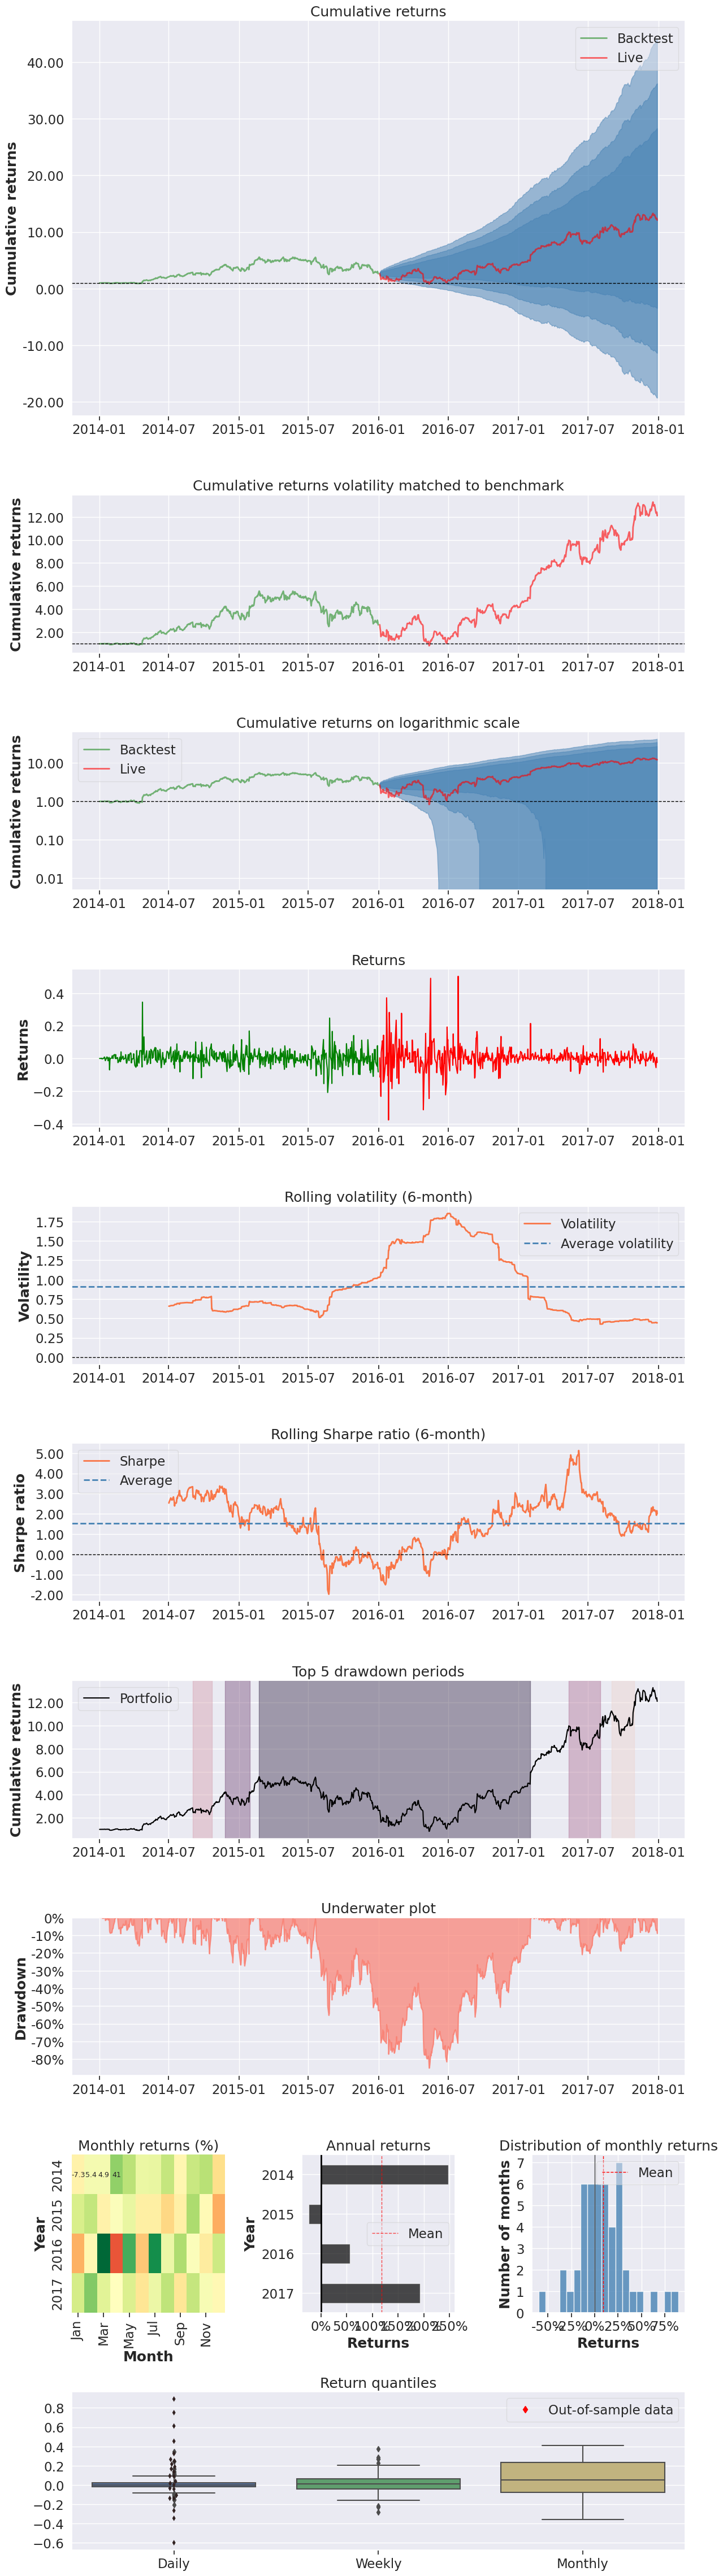

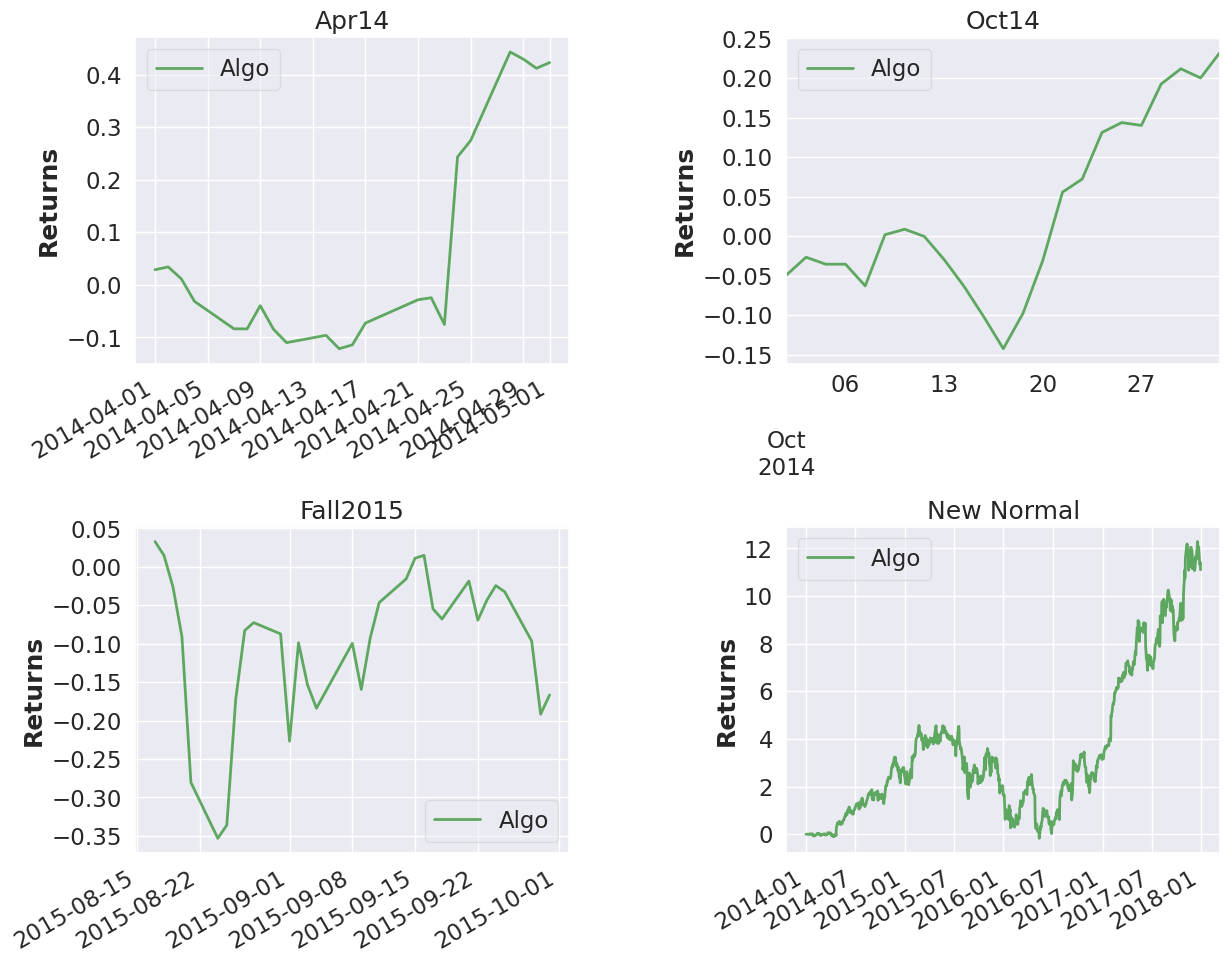

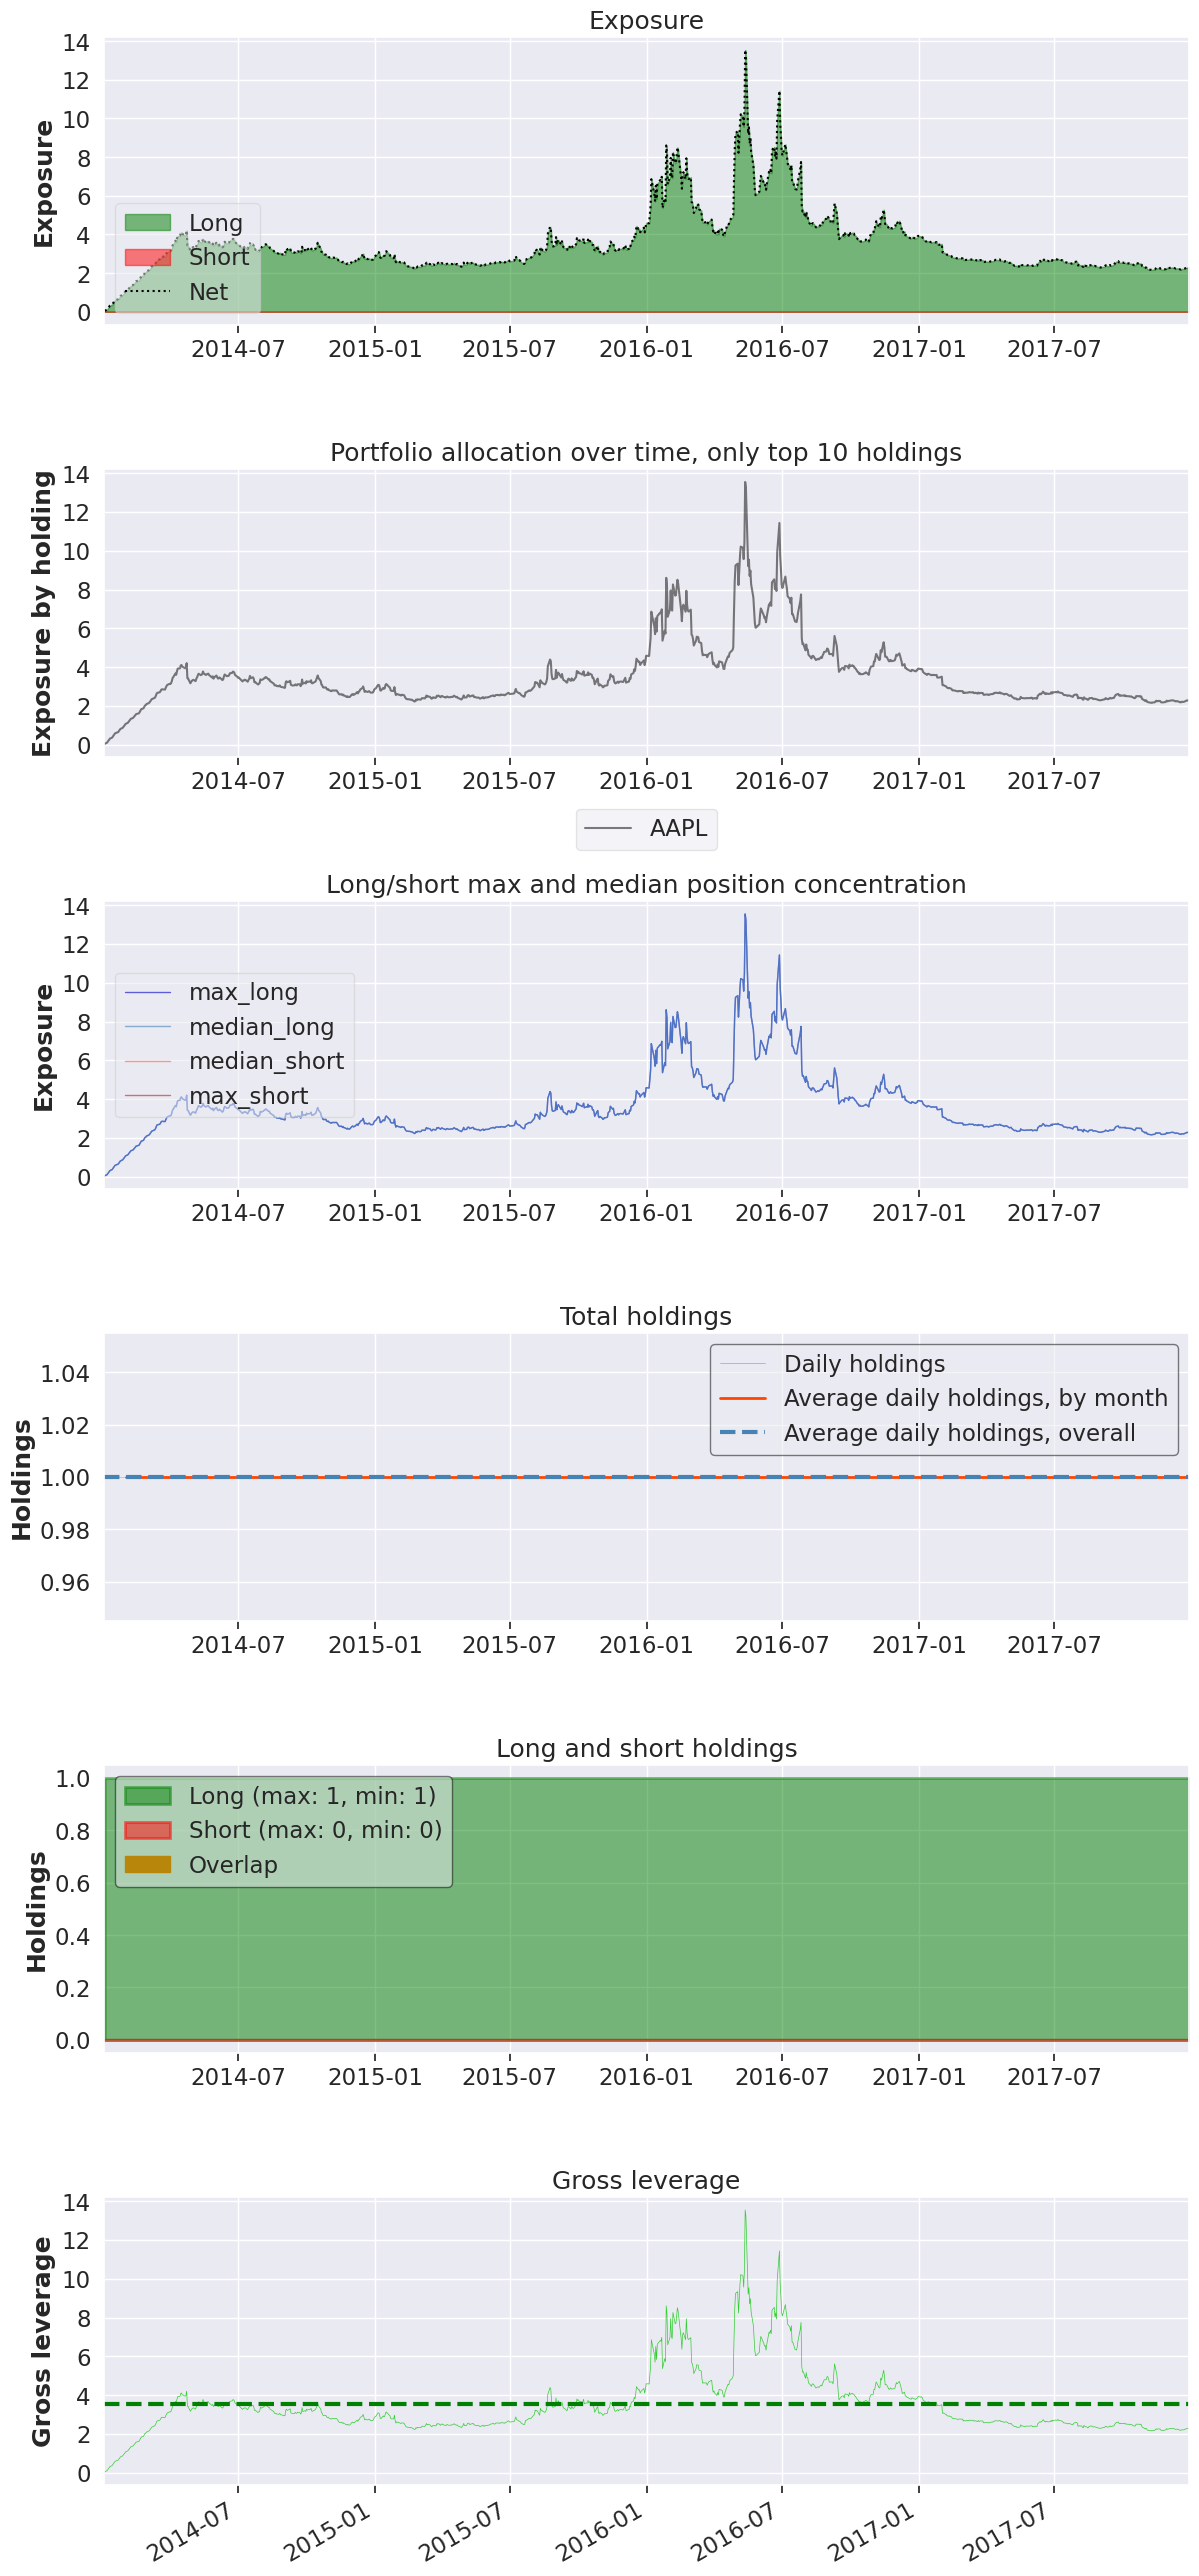

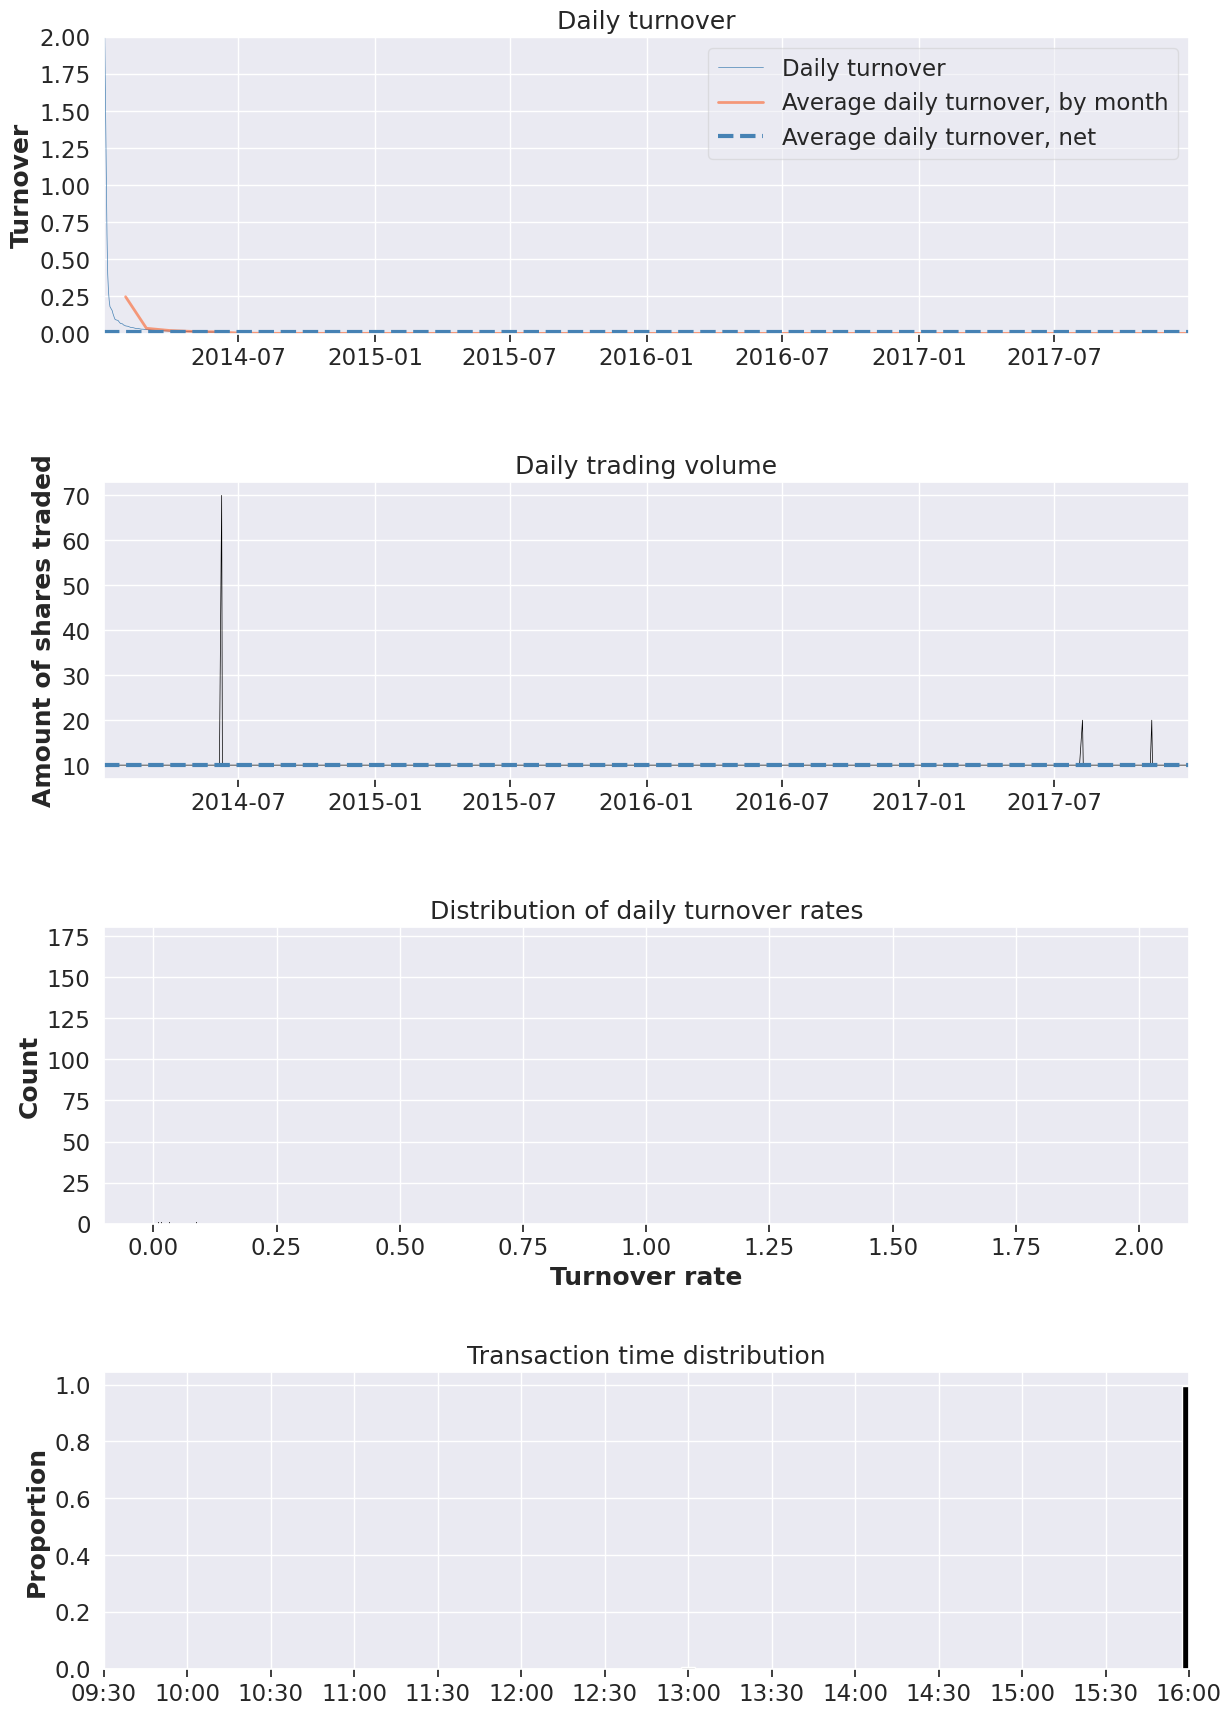

In [3]:
results = pd.read_pickle(os.path.join(os.environ['ROOT_DIR'], 'data/processed', 'experiment_1.pkl'))
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, live_start_date=live_start_date, round_trips=True)

In [4]:
import dagstermill as __dm_dagstermill
__dm_dagstermill._teardown()
